# Cuaca Hari Ini

In [2]:
from IPython.display import IFrame
IFrame('https://weather.com/id-ID/cuaca/tiapjam/l/IDZZ7520:1:ID', width=700, height=350)

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
#Downloading data
page = requests.get('https://weather.com/id-ID/cuaca/tiapjam/l/IDZZ7520:1:ID')

In [ ]:
#Response Status
page

In [ ]:
page.content

In [ ]:
# Create BeautifulSoup
soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
print(soup.prettify())

In [ ]:
hariini = soup.find(class_="region region-main")

In [ ]:
print(hariini.prettify())

In [ ]:
hariinitable = hariini.find(class_='twc-table')
table_body = hariinitable.find('tbody')
rows = table_body.find_all('tr')

In [ ]:
description = []
for row in rows:
    description.append(row.find(headers='description').get_text())

In [ ]:
description

In [ ]:
time = list(row.find(headers='time').get_text() for row in rows)
description = list(row.find(headers='description').get_text() for row in rows)
temp = list(row.find(headers='temp').get_text() for row in rows)
feels = list(row.find(headers='feels').get_text() for row in rows)
precip = list(row.find(headers='precip').get_text() for row in rows)
humidity = list(row.find(headers='humidity').get_text() for row in rows)
wind = list(row.find(headers='wind').get_text() for row in rows)

In [ ]:
import pandas as pd
weather = pd.DataFrame({
    "time": time,
    "description": description, 
    "temp": temp, 
    "feels":feels,
    "precip": precip, 
    "humidity": humidity, 
    "wind":wind,
})
weather

In [ ]:
time = []
day = []
for row in rows:
    datetime = row.find(headers='time')
    hourly_time = datetime.find(class_="hourly-time").get_text().rstrip('\n')
    hourly_date = datetime.find(class_="hourly-date").get_text()
    time.append(hourly_time)
    day.append(hourly_date)

In [ ]:
import pandas as pd
weather = pd.DataFrame({
    "time": time,
    "day": day,
    "description": description, 
    "temp": temp, 
    "feels":feels,
    "precip": precip, 
    "humidity": humidity, 
    "wind":wind,
})
weather

In [ ]:
hari = {'Jum': 'Jumat', 'Sab': 'Sabtu'}

weather['day'] = weather['day'].apply(lambda x: hari[x])
weather

# Exercise: Cuaca 10 Hari

In [3]:
from IPython.display import IFrame
IFrame('https://weather.com/id-ID/cuaca/10hari/l/IDZZ7520:1:ID', width=700, height=350)

In [ ]:
# Insert your codes

# Kompas

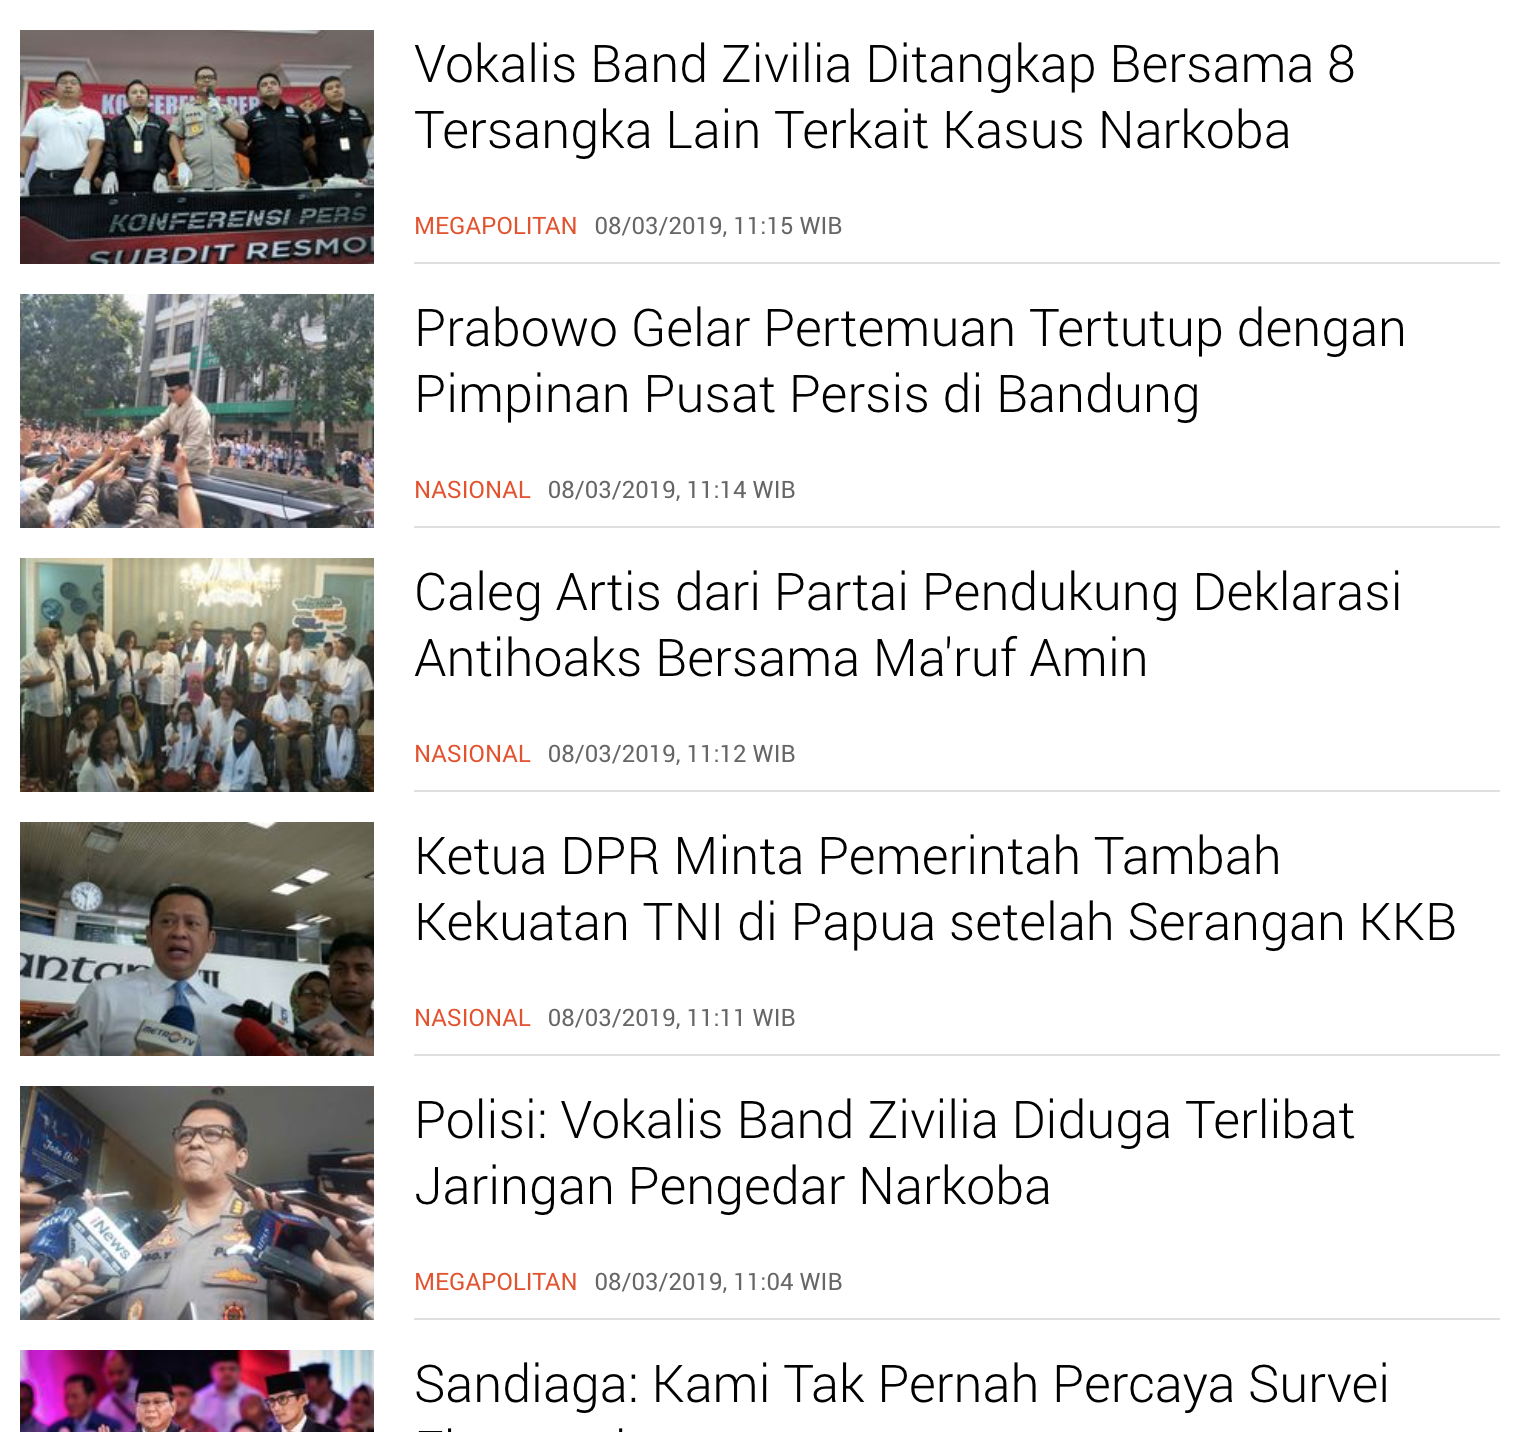

In [6]:
from IPython.display import Image
Image(filename='img/img4.png', width=500, height=300)

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
pagelist = requests.get('https://indeks.kompas.com/news/2019-03-08/1')

In [ ]:
soup = BeautifulSoup(pagelist.content, 'html.parser')

In [ ]:
kolomartikel = soup.find(class_="latest--indeks mt2 clearfix")

In [ ]:
listartikel = kolomartikel.find_all(class_="article__list")

In [ ]:
title = []
category = []
date = []
url = []
image = []

for row in listartikel:
    title_text = row.find(class_='article__link').text
    category_text = row.find(class_='article__subtitle').text
    date_text = row.find(class_='article__date').text
    url_text = row.find(class_='article__link')['href']
    image_text = row.find('img')['src']
    #image = row.find('a').img['src']
    
    title.append(title_text)
    category.append(category_text)
    date.append(date_text)
    url.append(url_text)
    image.append(image_text)

In [ ]:
import pandas as pd
kompasinfo = pd.DataFrame({
    "title": title,
    "category": category,
    "date": date, 
    "url": url, 
    "image": image
    })
kompasinfo

# Exercise = Get Kompas Articles From kompasinfo['url']

In [ ]:
urls = kompasinfo['url']

In [ ]:
urls

## Output: DataFrame = Author, Title, Article, Url, Date

In [ ]:
# Insert Your Code